# 

In [93]:
import pymysql
import redis

#redis connection
r = redis.StrictRedis(host='172.17.0.2', port=6379, db=0)

#connect maria rdb
db = pymysql.connect(
        host='172.17.0.4',
        user='root',
        passwd='1234',
        db='rental',
        charset='utf8mb4'
    )
#設置cursor
cursor = db.cursor()
#cursor.execute('SELECT * FROM typeID;')

In [12]:
len(r.keys("result:200:*"))

24799

In [94]:
cursor.execute('SELECT ID, cityID, pet, rent, space FROM rentInfo;')

24799

In [95]:
datas = cursor.fetchall()

In [96]:
cursor.close()
datas[:10]

((1, 251, 'N', 25000, Decimal('62.34')),
 (2, 251, 'N', 32000, Decimal('50.70')),
 (3, 251, 'N', 25000, Decimal('44.97')),
 (4, 251, 'N', 5000, Decimal('7.00')),
 (5, 239, 'N', 6000, Decimal('7.99')),
 (6, 251, 'N', 6500, Decimal('8.00')),
 (7, 251, 'N', 23000, Decimal('46.83')),
 (8, 111, 'N', 35000, Decimal('41.67')),
 (9, 111, 'N', 30000, Decimal('37.84')),
 (10, 111, 'N', 8300, Decimal('8.00')))

In [6]:
type(datas[0])

tuple

In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.DataFrame(list(datas))

In [97]:
df.columns = ["ID", "cityID", "pet", "rent", "space"]
df.tail()

,ID,cityID,pet,rent,space
24794,24795,242,N,3000,3.00
24795,24796,111,N,12500,13.00
24796,24797,220,N,7000,6.00
24797,24798,104,N,25000,15.18
24798,24799,234,N,8000,7.00


In [10]:
for key in r.keys("result:1300:*")[:3]:
    print(key, r.hgetall(key))

b'result:1300:1468' {b"b'baseEnviro:Towing'": b'0', b"b'baseEnviro:Sport'": b'6', b"b'baseEnviro:School'": b'46', b"b'baseEnviro:Train'": b'0', b"b'baseEnviro:Exam'": b'7', b"b'baseEnviro:DepartmentStore'": b'3', b"b'baseEnviro:Supermarket'": b'10', b"b'baseEnviro:Library'": b'3', b"b'baseEnviro:Pharmacy'": b'39', b"b'baseEnviro:Scenic'": b'1', b"b'baseEnviro:Police'": b'2', b"b'baseEnviro:FireStation'": b'2', b"b'baseEnviro:Museum'": b'1', b"b'baseEnviro:MRT'": b'2', b"b'baseEnviro:Hospital'": b'2', b"b'baseEnviro:UBike'": b'13', b"b'baseEnviro:Food'": b'747', b"b'baseEnviro:BookStore'": b'6', b"b'baseEnviro:Theater'": b'1', b"b'baseEnviro:Bus'": b'898', b"b'baseEnviro:Charger'": b'2', b"b'baseEnviro:Park'": b'0'}
b'result:1300:13434' {b"b'baseEnviro:Towing'": b'0', b"b'baseEnviro:Sport'": b'27', b"b'baseEnviro:School'": b'40', b"b'baseEnviro:Train'": b'0', b"b'baseEnviro:Exam'": b'10', b"b'baseEnviro:DepartmentStore'": b'1', b"b'baseEnviro:Supermarket'": b'8', b"b'baseEnviro:Library'

In [15]:
datas_r500 = [r.hgetall("result:{radius}:{id}".format(id=i,radius=500)) for i in df.ID]

df_r500 = pd.DataFrame.from_dict(datas_r500, orient='columns')

In [16]:
df_r500.head()

,"b""b'baseEnviro:BookStore'""","b""b'baseEnviro:Bus'""","b""b'baseEnviro:Charger'""","b""b'baseEnviro:DepartmentStore'""","b""b'baseEnviro:Exam'""","b""b'baseEnviro:FireStation'""","b""b'baseEnviro:Food'""","b""b'baseEnviro:Hospital'""","b""b'baseEnviro:Library'""","b""b'baseEnviro:MRT'""",...,"b""b'baseEnviro:Pharmacy'""","b""b'baseEnviro:Police'""","b""b'baseEnviro:Scenic'""","b""b'baseEnviro:School'""","b""b'baseEnviro:Sport'""","b""b'baseEnviro:Supermarket'""","b""b'baseEnviro:Theater'""","b""b'baseEnviro:Towing'""","b""b'baseEnviro:Train'""","b""b'baseEnviro:UBike'"""
0,b'1',b'20',b'0',b'0',b'2',b'0',b'20',b'0',b'0',b'0',...,b'0',b'0',b'0',b'10',b'2',b'1',b'0',b'0',b'0',b'1'
1,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,b'0',b'10',b'0',b'0',b'0',b'0',b'42',b'0',b'0',b'0',...,b'0',b'0',b'1',b'0',b'2',b'0',b'0',b'0',b'0',b'0'
3,b'2',b'37',b'1',b'0',b'2',b'2',b'327',b'1',b'1',b'0',...,b'2',b'0',b'19',b'5',b'6',b'0',b'0',b'0',b'0',b'2'
4,b'0',b'0',b'0',b'0',b'1',b'0',b'8',b'1',b'0',b'0',...,b'0',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'0',b'0'


In [17]:
df_r500.columns = df_r500.columns.map(lambda x: str(x).split('\'')[1])

df_r500 = df_r500.applymap(lambda x: int(x))

test_df = df.join(df_r500)

yn = {'N':0,'Y':1}
test_df.pet = test_df.pet.map(lambda x: yn.get(x))

In [18]:
test_df.head()

,ID,cityID,pet,rent,space,baseEnviro:BookStore,baseEnviro:Bus,baseEnviro:Charger,baseEnviro:DepartmentStore,baseEnviro:Exam,...,baseEnviro:Pharmacy,baseEnviro:Police,baseEnviro:Scenic,baseEnviro:School,baseEnviro:Sport,baseEnviro:Supermarket,baseEnviro:Theater,baseEnviro:Towing,baseEnviro:Train,baseEnviro:UBike
0,1,251,0,25000,62.34,1,20,0,0,2,...,0,0,0,10,2,1,0,0,0,1
1,2,251,0,32000,50.70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,251,0,25000,44.97,0,10,0,0,0,...,0,0,1,0,2,0,0,0,0,0
3,4,251,0,5000,7.00,2,37,1,0,2,...,2,0,19,5,6,0,0,0,0,2
4,5,239,0,6000,7.99,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0


In [19]:
exp_var = ['pet']
exp_var.extend(df_r500.columns)
test_df[exp_var].head()

,pet,baseEnviro:BookStore,baseEnviro:Bus,baseEnviro:Charger,baseEnviro:DepartmentStore,baseEnviro:Exam,baseEnviro:FireStation,baseEnviro:Food,baseEnviro:Hospital,baseEnviro:Library,...,baseEnviro:Pharmacy,baseEnviro:Police,baseEnviro:Scenic,baseEnviro:School,baseEnviro:Sport,baseEnviro:Supermarket,baseEnviro:Theater,baseEnviro:Towing,baseEnviro:Train,baseEnviro:UBike
0,0,1,20,0,0,2,0,20,0,0,...,0,0,0,10,2,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,10,0,0,0,0,42,0,0,...,0,0,1,0,2,0,0,0,0,0
3,0,2,37,1,0,2,2,327,1,1,...,2,0,19,5,6,0,0,0,0,2
4,0,0,0,0,0,1,0,8,1,0,...,0,0,0,1,1,0,0,0,0,0


In [20]:
from sklearn.preprocessing import Normalizer

nml = Normalizer()
X_all_nml = nml.fit_transform(test_df[exp_var])


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [21]:
X_all_nml[:2]

array([[ 0.        ,  0.03296902,  0.65938047,  0.        ,  0.        ,
         0.06593805,  0.        ,  0.65938047,  0.        ,  0.        ,
         0.        ,  0.        ,  0.09890707,  0.        ,  0.        ,
         0.        ,  0.32969024,  0.06593805,  0.03296902,  0.        ,
         0.        ,  0.        ,  0.03296902],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [22]:
cov_mat = np.cov(X_all_nml.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[  1.49445831e-01   2.35649708e-02   9.46367277e-03   3.01599073e-03
   2.27325014e-03   1.91525754e-03   1.53687738e-03   7.80692758e-04
   6.93028234e-04   4.37106659e-04   3.65023972e-04   2.80645396e-04
   2.27476115e-04   1.51955489e-04   1.15363197e-04   8.37912483e-05
   3.99960601e-05   7.93332696e-06   1.02142823e-05   1.28906362e-05
   1.57569096e-05   1.93371114e-05   1.81290833e-05]


In [23]:
tot = sum(eigen_vals)
# 將特徵值排序  並計算百分比
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
# 加總
cum_var_exp = np.cumsum(var_exp)

var_exp ,cum_var_exp

([0.76845704767901013,
  0.12117211817306273,
  0.048662622354084126,
  0.015508357205361015,
  0.011689152360104692,
  0.0098483386636335872,
  0.0079026912035355321,
  0.0040143565617351022,
  0.0035635817170444057,
  0.0022476217030346665,
  0.0018769693472581999,
  0.0014430909927839839,
  0.0011696922064764342,
  0.00078136182157496231,
  0.00059320264331171003,
  0.00043085829102679582,
  0.00020566150351168303,
  9.9432278707461684e-05,
  9.3220545132816348e-05,
  8.1022723524245221e-05,
  6.6284219541974245e-05,
  5.2522289728909107e-05,
  4.0793516814672669e-05],
 array([ 0.76845705,  0.88962917,  0.93829179,  0.95380015,  0.9654893 ,
         0.97533764,  0.98324033,  0.98725468,  0.99081827,  0.99306589,
         0.99494286,  0.99638595,  0.99755564,  0.998337  ,  0.9989302 ,
         0.99936106,  0.99956672,  0.99966616,  0.99975938,  0.9998404 ,
         0.99990668,  0.99995921,  1.        ]))

In [24]:
len(var_exp)

23

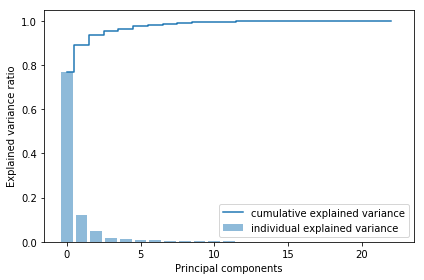

In [25]:
import matplotlib.pyplot as plt


plt.bar(range(0, 23), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(0, 23), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [26]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low

eigen_pairs.sort(reverse=True)


In [27]:
eigen_pairs

[(0.14944583094503722,
  array([  4.06363628e-03,  -2.34907997e-03,   7.21958488e-01,
           1.99618288e-03,  -1.73726644e-03,  -6.93697552e-03,
          -6.29176591e-04,  -6.91481055e-01,  -1.15610823e-03,
           5.32338511e-04,   4.43344582e-04,  -1.64080068e-05,
          -1.07641687e-03,   5.78184514e-03,  -4.88954614e-04,
          -5.72162904e-03,  -6.59860832e-03,  -2.06584609e-02,
          -6.97106736e-04,  -1.11695073e-03,  -2.13832262e-04,
           2.22679214e-04,   3.28872261e-03])),
 (0.023564970797571135,
  array([  1.59542282e-01,  -2.32594831e-03,  -6.55577203e-01,
           1.51030977e-02,  -1.77947697e-03,   1.63831843e-02,
           5.56497635e-03,  -6.90684147e-01,   1.19701594e-03,
           1.17856337e-02,  -4.73267150e-03,  -1.20440549e-04,
           7.79904762e-02,  -4.16591966e-02,   1.69810001e-02,
           7.78354101e-02,   1.62111753e-01,   1.54382848e-01,
           4.85062061e-03,  -1.14119978e-03,   8.98436580e-04,
           1.24005735e-

In [28]:
# 取前兩名重要的向量  並排列整齊
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[  4.06363628e-03   1.59542282e-01]
 [ -2.34907997e-03  -2.32594831e-03]
 [  7.21958488e-01  -6.55577203e-01]
 [  1.99618288e-03   1.51030977e-02]
 [ -1.73726644e-03  -1.77947697e-03]
 [ -6.93697552e-03   1.63831843e-02]
 [ -6.29176591e-04   5.56497635e-03]
 [ -6.91481055e-01  -6.90684147e-01]
 [ -1.15610823e-03   1.19701594e-03]
 [  5.32338511e-04   1.17856337e-02]
 [  4.43344582e-04  -4.73267150e-03]
 [ -1.64080068e-05  -1.20440549e-04]
 [ -1.07641687e-03   7.79904762e-02]
 [  5.78184514e-03  -4.16591966e-02]
 [ -4.88954614e-04   1.69810001e-02]
 [ -5.72162904e-03   7.78354101e-02]
 [ -6.59860832e-03   1.62111753e-01]
 [ -2.06584609e-02   1.54382848e-01]
 [ -6.97106736e-04   4.85062061e-03]
 [ -1.11695073e-03  -1.14119978e-03]
 [ -2.13832262e-04   8.98436580e-04]
 [  2.22679214e-04   1.24005735e-03]
 [  3.28872261e-03   5.21078421e-02]]


In [29]:
X_pca = X_all_nml.dot(w)

In [111]:
# 直接使用scikit-learn實作
from sklearn.cluster import KMeans
# n_init=10, 隨機做十次  自動找出SSE最小的那一次
# max_iter=300, 或是 tol=1e-04, 為中止條件
km = KMeans(n_clusters=6, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X_all_nml)

In [112]:
y_km

array([0, 1, 3, ..., 3, 5, 4], dtype=int32)

In [32]:
X = pd.DataFrame(X_pca,columns=['x','y'])
X['y_km'] = y_km

In [33]:
X[y_km == 0]['x']

1        0.000000
15       0.004064
61      -0.008712
105      0.000000
116      0.000000
160      0.000000
164      0.000000
165     -0.010347
190      0.001996
213      0.000000
227      0.000000
275     -0.020658
280      0.000000
290      0.000000
303      0.000000
305      0.000000
391      0.000000
415      0.000000
451     -0.008712
730      0.322307
893      0.000000
959      0.000000
1045     0.000000
1248     0.003289
1451     0.000000
1623    -0.314340
2529    -0.004604
2659     0.000000
2669    -0.014953
2670     0.000000
           ...   
23899    0.000000
23901    0.000000
23902    0.000000
23904    0.004064
23907    0.000000
23908    0.004064
23909    0.000000
23911    0.000000
23912   -0.205896
23923    0.000000
23962    0.004064
24039    0.004064
24046    0.000000
24088   -0.327655
24116   -0.397557
24166    0.000000
24173    0.004064
24222   -0.446679
24335    0.000000
24355    0.004064
24356    0.000000
24413    0.001996
24421   -0.414964
24424    0.000000
24512   -0

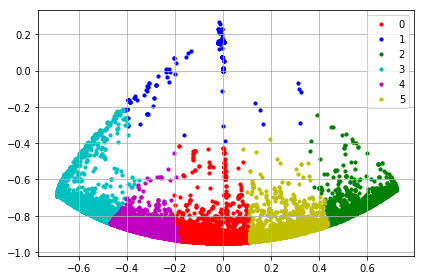

In [113]:
# 作圖

colors = ['r', 'b', 'g', 'c', 'm', 'y']

for l, c in zip(range(6), colors):
    plt.scatter(X[y_km == l].x , 
                X[y_km == l].y, 
                c=c, label=l, s=10)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [35]:
plt.savefig('./kmean_c4.jpg')

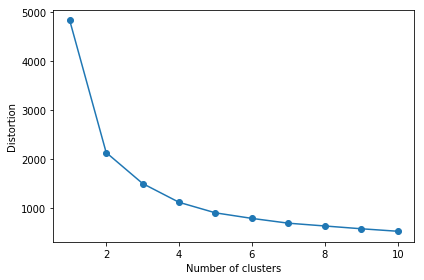

In [36]:
# 如果選取k越大 SSE必然越小
# 但分太多類別也沒有意義
# 這邊藉由SSE 的變化來選擇要分幾類
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_all_nml)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [40]:
cursor.execute("select * from typeID;")
typeID = cursor.fetchall()

In [ ]:
typeID

In [ ]:
typeclass={'1':['Food','Supermarket'],
          '2':['Bus','MRT','UBike','Train','Exam','Charger', 'Towing'],
          '3':['BookStore','DepartmentStore','Library', 'Museum','Theater'],
          '4':['Park','Scenic','Sport'],
          '5':['School', 'Hospital', 'Pharmacy','Police','FireStation']}

In [74]:
result_df = test_df.copy()
result_df['y'] = y_km

In [110]:
result_df.groupby(by='y').mean().T

y,0,1,2,3
ID,12894.193814,12255.065003,12485.831490,12425.107265
cityID,235.395876,158.196402,181.340281,148.470673
pet,0.245361,0.195241,0.176314,0.196592
rent,24166.292784,68582.158561,260300.537831,73937.797489
baseEnviro:BookStore,0.000000,0.678584,1.101442,0.233004
baseEnviro:Bus,0.047423,132.873244,87.644706,113.511749
baseEnviro:Charger,0.032990,0.444573,0.426412,0.273363
baseEnviro:DepartmentStore,0.000000,0.260128,0.818155,0.065471
baseEnviro:Exam,0.043299,2.256065,2.208416,1.101345
baseEnviro:FireStation,0.026804,0.451306,0.500198,0.214529


In [86]:
resilt_result_df.max()

ID                                24799.0
cityID                            10491.0
pet                                   1.0
rent                          580000000.0
space                             18000.0
baseEnviro:BookStore                 11.0
baseEnviro:Bus                      491.0
baseEnviro:Charger                    3.0
baseEnviro:DepartmentStore            8.0
baseEnviro:Exam                      12.0
baseEnviro:FireStation                3.0
baseEnviro:Food                    1411.0
baseEnviro:Hospital                   4.0
baseEnviro:Library                    5.0
baseEnviro:MRT                        5.0
baseEnviro:Museum                     8.0
baseEnviro:Park                      11.0
baseEnviro:Pharmacy                  27.0
baseEnviro:Police                     5.0
baseEnviro:Scenic                    25.0
baseEnviro:School                    28.0
baseEnviro:Sport                     20.0
baseEnviro:Supermarket                7.0
baseEnviro:Theater                